In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering


## Dataset Selection and Preprocessing

In [ ]:
df = pd.read_csv('FatalPoliceShooting.csv')

In [ ]:
# Few rows of data
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [ ]:
# Column names
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'longitude', 'latitude', 'is_geocoding_exact'],
      dtype='object')

In [ ]:
#  Data Statistical details
df.describe()

,id,age,longitude,latitude
count,6329.000000,6049.000000,6022.000000,6022.000000
mean,3506.622847,37.092412,-97.187102,36.658098
std,1978.793408,13.010574,16.621749,5.381583
min,3.000000,6.000000,-158.137000,19.498000
25%,1790.000000,27.000000,-112.106500,33.470750
50%,3516.000000,35.000000,-94.358000,36.101000
75%,5228.000000,45.000000,-83.097250,39.995000
max,6901.000000,91.000000,-67.867000,71.301000


In [ ]:
# Dataset details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6329 entries, 0 to 6328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       6329 non-null   int64  
 1   name                     6095 non-null   object 
 2   date                     6329 non-null   object 
 3   manner_of_death          6329 non-null   object 
 4   armed                    6121 non-null   object 
 5   age                      6049 non-null   float64
 6   gender                   6328 non-null   object 
 7   race                     5708 non-null   object 
 8   city                     6329 non-null   object 
 9   state                    6329 non-null   object 
 10  signs_of_mental_illness  6329 non-null   bool   
 11  threat_level             6329 non-null   object 
 12  flee                     5925 non-null   object 
 13  body_camera              6329 non-null   bool   
 14  longitude               

In [ ]:
# Missing values
df.isnull().sum()

,0
id,0
name,234
date,0
manner_of_death,0
armed,208
age,280
gender,1
race,621
city,0
state,0


In [ ]:
# Fill missing numeric values with median
df['age'] = df['age'].fillna(df['age'].median())
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
df['latitude'] = df['latitude'].fillna(df['latitude'].median())

# Fill missing categorical values with 'Unknown'
cat_cols = ['gender', 'race', 'armed', 'signs_of_mental_illness', 'threat_level', 'flee']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

In [ ]:
# Missing values
df.isnull().sum()

,0
id,0
name,0
date,0
manner_of_death,0
armed,0
age,0
gender,0
race,0
city,0
state,0


## Features and Preprocess Dataset

In [ ]:
# Prepare preprocessing: scale numeric and encode categorical
numeric_features = ['age', 'longitude', 'latitude']
categorical_features = ['gender', 'race', 'armed', 'signs_of_mental_illness', 'threat_level', 'flee']

In [ ]:
# Build preprocessing pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

X_processed = preprocessor.fit_transform(df)
X_processed

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 56961 stored elements and shape (6329, 122)>

## Clustering
### K-Means Clustering

In [ ]:
# Determine optimal k with Elbow and Silhouette methods
sse = []
sil_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    sse.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X_processed, kmeans.labels_))


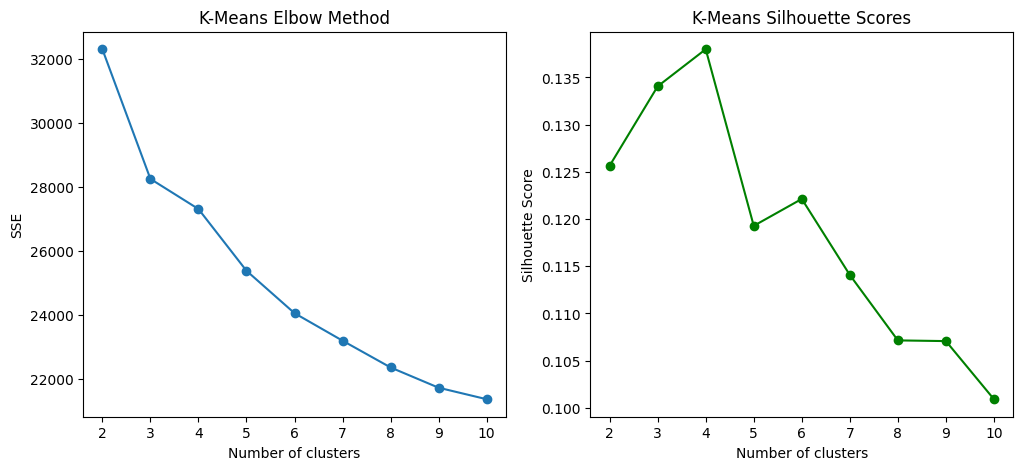

Best k for K-Means: 4


In [ ]:
# Plot Elbow and Silhouette
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, sse, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('K-Means Elbow Method')

plt.subplot(1,2,2)
plt.plot(K, sil_scores, 'o-', color='green')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('K-Means Silhouette Scores')

plt.show()

best_k_kmeans = K[np.argmax(sil_scores)]
print(f"Best k for K-Means: {best_k_kmeans}")

kmeans_final = KMeans(n_clusters=best_k_kmeans, random_state=42)
clusters_kmeans = kmeans_final.fit_predict(X_processed)

### Hierarchical Clustering

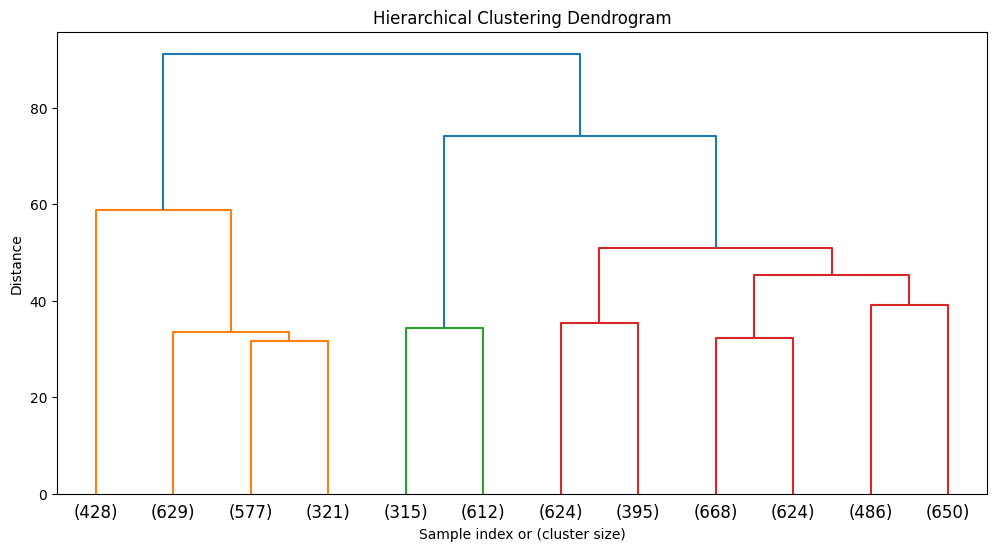

In [ ]:
# Convert sparse matrix to dense array for hierarchical clustering
X_processed_dense = X_processed.toarray()

# Compute linkage matrix
Z = linkage(X_processed_dense, method='ward')

# Plot dendrogram (truncate for clarity)
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
plt.show()

# Cut dendrogram to form clusters (choose same k as KMeans for comparison)
clusters_hier = fcluster(Z, t=best_k_kmeans, criterion='maxclust')

## Dimensionality Reduction & Visualization

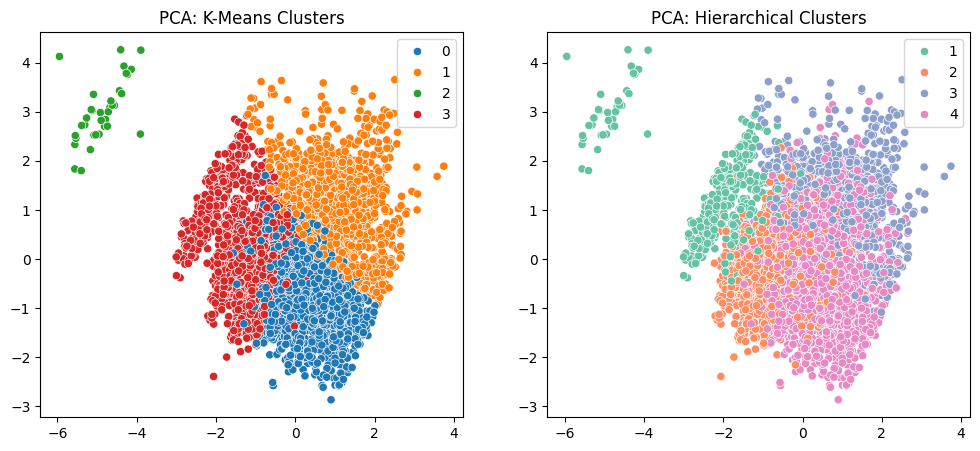

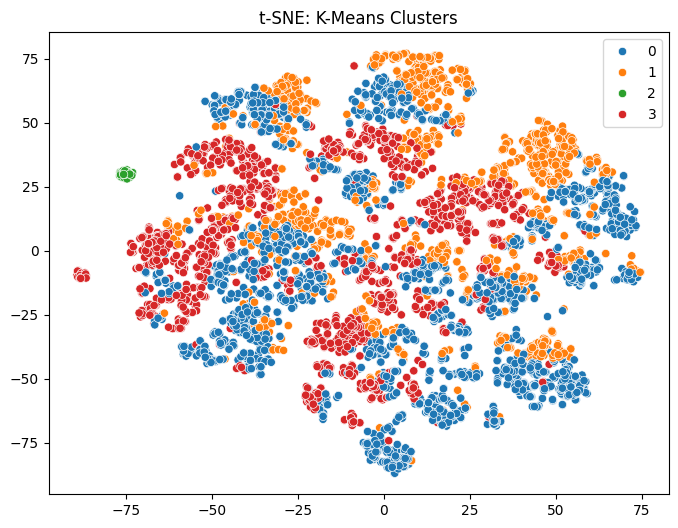

In [ ]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_kmeans, palette='tab10')
plt.title('PCA: K-Means Clusters')

plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters_hier, palette='Set2')
plt.title('PCA: Hierarchical Clusters')

plt.show()

# t-SNE Visualization (can be slower)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_processed.toarray() if hasattr(X_processed, 'toarray') else X_processed)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=clusters_kmeans, palette='tab10')
plt.title('t-SNE: K-Means Clusters')
plt.show()

## Model Evaluation

In [ ]:
sil_hier = silhouette_score(X_processed, clusters_hier)
print(f'Silhouette Score for Hierarchical Clustering: {sil_hier:.3f}')


Silhouette Score for Hierarchical Clustering: 0.100


### A Silhouette Score of 0.100 for hierarchical clustering is quite low, indicating the clusters are not very well separated.

In [ ]:
# Hierarchical clustering on PCA components
hier_pca = AgglomerativeClustering(n_clusters=best_k_kmeans, linkage='ward')
clusters_pca = hier_pca.fit_predict(X_pca)

# Evaluate clusters
sil_score_pca = silhouette_score(X_pca, clusters_pca)
print(f'Silhouette Score after PCA + Hierarchical Clustering: {sil_score_pca:.3f}')

Silhouette Score after PCA + Hierarchical Clustering: 0.297


### A Silhouette Score of 0.297 after applying PCA before hierarchical clustering is a solid improvement over 0.100. This means:The clusters are more distinct and better separated in the reduced PCA space.PCA helped by removing noise and focusing on the main variance directions.

